Review:

Table is called a dataframe short for df and a columm is called a series

useful df functions:

.head, .shape, .info, .describe

to access specific column will use df_name["column name"] and then filter rows as  dog[dogs["date of birth"] > 50]

for categricla data use the isin method to filter rows.

sorting example:

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

# Filter categorical data
canu = ["California", "Arizona", "Nevada", "Utah"]

mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

print(mojave_homelessness)

# Using filter and creating new columsn to find specific data to find "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out

-> Create indiv_per_10k col as homeless individuals per 10k state pop

homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]

-> Subset rows for indiv_per_10k greater than 20

high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

-> Sort high_homelessness by descending indiv_per_10k

high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

-> From high_homelessness_srt, select the state and indiv_per_10k cols

result = high_homelessness_srt[["state","indiv_per_10k"]]

-> See the result
print(result)

# More Advanced: Filtering Data & Apply Statistical Functions

We can filter rows in a DataFrame based on a condition and then apply statistical functions to a specific column:

df[df['condition']][column_name].statistics_function()

# Grouping Data (Groupby)

You can group data by a condition and calculate statistics within each group.

This process is commonly referred to as "split-apply-combine."

df.groupby('condition')[column_name].statistics_function()





Project:

BIG Question: What influences sleep quality and how this contributes to a personas BMI level. Will take a look at how differnt variables relate and reflect the life quality. This is a very important aspect of life so now by learning through these various particapants will be able to find the best approach to improving someone life style.
Questions?

What drives somsone to have a normal bmi level?
How does excerise and sleep levels relate to someones health?
and more... 

In [7]:
import numpy as np #  particularly useful when dealing with arrays and matrices
import pandas as pd #Pandas is a powerful data manipulation and analysis library built on top of NumPy.
# It's particularly well-suited for handling structured data and is widely used in data science and machine learning workflows.
import matplotlib.pyplot as plt
import seaborn as sns


- Use scikit-learn for traditional machine learning tasks, rapid prototyping, small to medium-sized datasets, and standard preprocessing tasks.
- Use TensorFlow for deep learning, handling large-scale datasets, production deployment, advanced machine learning techniques, and tasks requiring high flexibility and performance.

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visual Example and Classification Example:

Task: Classify whether a customer will buy a product (Yes/No).
Input Features: Age, Income, Browsing History.
Output: "Yes" or "No".
Regression Example:

Task: Predict the price of a house.
Input Features: Size of the house, Number of bedrooms, Location.
Output: A continuous value representing the price of the house (e.g., $250,000).

In [9]:
# reading in our data using .read_csv another ways are
# - pd.read_excel, pd.read_sql, pd.read_json, pd.read_html,

df = pd.read_csv("/Users/evercampos/DataS/Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# As we read this csv file what can we learn from this data

# participants consist of Male and Female

In [28]:

Male = (df["Gender"] == "Male").sum()
Female = (df["Gender"] == "Female").sum()
print("Male: " + str(Male))
print("Female: " + str(Female))


Male: 189
Female: 185


# Occupations 

In [32]:
occup = df["Occupation"].unique()
occup

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [37]:

# df.groupby('condition')[column_name].statistics_function()
#df.groupby(df["Occupation"])["Occupation"].count()



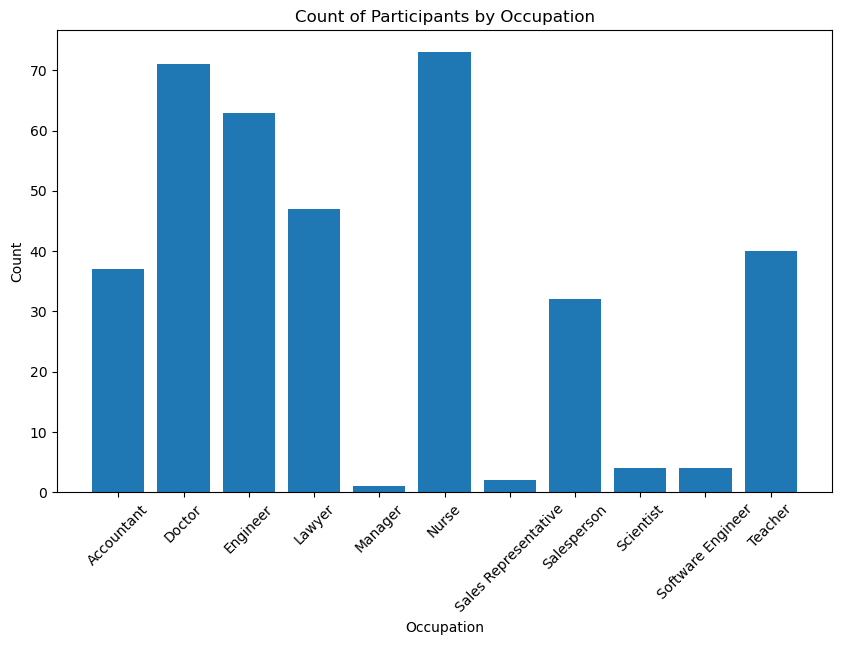

In [36]:
occupation_counts = df.groupby(df["Occupation"])["Occupation"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Occupation"], occupation_counts["Count"])
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Count of Participants by Occupation")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Summary
Original Series: The result of the group-by operation is a Series with the index as occupations and counts as values.
reset_index Method: Converts the Series into a DataFrame by turning the index into a column.
name Parameter: Specifies the name for the new column that contains the Series values.
The reset_index method is useful for converting a Series into a DataFrame and is often used after group-by operations to make the data easier to work with and plot.

# Average Age, Sleep, Daily Steps, Stress levels, Physical activity 

In [46]:
age_avg = np.average(df["Age"])
print("Age average: " + str(age_avg) + "Years Old")

sleep_avg = np.average(df["Quality of Sleep"])
print("Sleep average: " + str(sleep_avg) + " (scale: 1-10)")

steps_avg = np.average(df["Daily Steps"])
print("Steps average: " + str(steps_avg) + "steps")

stress_avg = np.average(df["Stress Level"])
print("Stress average: " + str(stress_avg) + " (scale: 1-10)")

phys_avg = np.average(df["Physical Activity Level"])
print("Physical activity (minutes/day) average: " + str(phys_avg))




Age average: 42.18449197860963Years Old
Sleep average: 7.31283422459893 (scale: 1-10
Steps average: 6816.844919786096steps
Stress average: 5.385026737967914 (scale: 1-10)
Physical activity (minutes/day) average: 59.17112299465241


Avg age is 42 years old so were currenlty dealing with middle age adults.

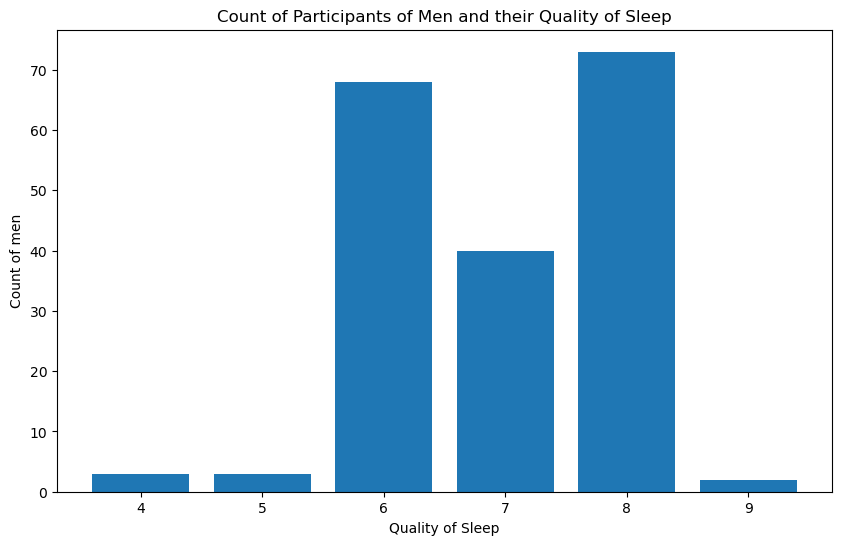

In [55]:
# print(df[df["Gender"] == "Male"].groupby("Quality of Sleep")["Gender"].count()) # will see sleep qulaity and occupation

occupation_counts = df[df["Gender"] == "Male"].groupby("Quality of Sleep")["Gender"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Quality of Sleep"], occupation_counts["Count"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Count of men")
plt.title("Count of Participants of Men and their Quality of Sleep")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [64]:
men_avg_sleep = df.groupby(df["Gender"] == "Male")["Quality of Sleep"]
men_avg_sleep

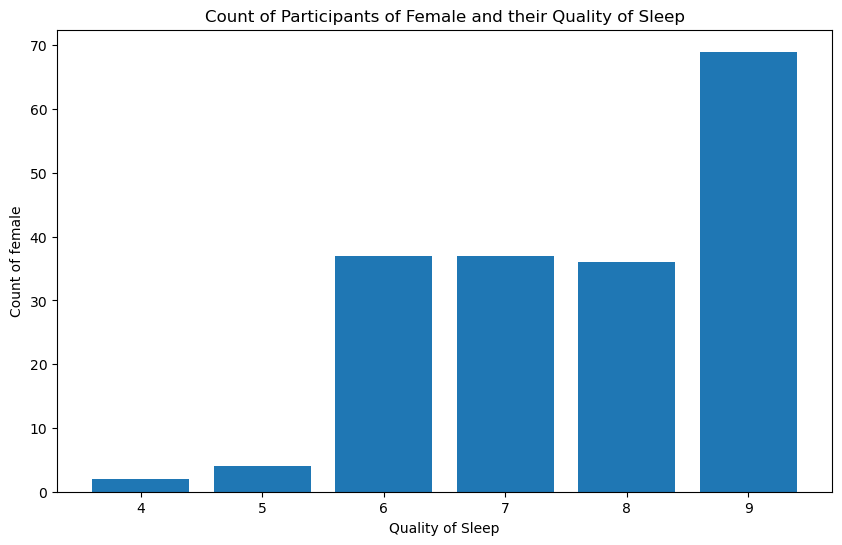

In [57]:
occupation_counts = df[df["Gender"] == "Female"].groupby("Quality of Sleep")["Gender"].count()

# Convert to DataFrame
occupation_counts = occupation_counts.reset_index(name="Count")

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts["Quality of Sleep"], occupation_counts["Count"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Count of female")
plt.title("Count of Participants of Female and their Quality of Sleep")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()